In [ ]:
# Importing essential libraries for data analysis and visualization
import pandas as pd       # pandas is used for data manipulation and analysis
import numpy as np        # numpy provides support for numerical operations, especially arrays
import matplotlib.pyplot as plt  # matplotlib is used for creating visualizations like plots and charts

# Adjusting pandas display settings for better readability in console outputs
pd.set_option("display.max_columns", None)  # Ensures all columns are shown when printing DataFrames
pd.set_option("display.width", 120)         # Sets the display width so wide DataFrames don't wrap awkwardly


In [ ]:
# Load all seven IoT device datasets from CSV files into separate pandas DataFrames
# Each file represents data collected from a different smart device
fridge     = pd.read_csv("data/raw/Train_Test_IoT_Fridge.csv")
thermostat = pd.read_csv("data/raw/Train_Test_IoT_Thermostat.csv")
garage     = pd.read_csv("data/raw/Train_Test_IoT_Garage_Door.csv")
gps        = pd.read_csv("data/raw/Train_Test_IoT_GPS_Tracker.csv")
motion     = pd.read_csv("data/raw/Train_Test_IoT_Motion_Light.csv")
modbus     = pd.read_csv("data/raw/Train_Test_IoT_Modbus.csv")
weather    = pd.read_csv("data/raw/Train_Test_IoT_Weather.csv")

# Print a summary of each dataset: name, number of rows, and number of columns
# This helps quickly verify that all files loaded correctly and gives a sense of their size
print("Loaded datasets:")
for name, df in {
    "Fridge": fridge, "Thermostat": thermostat, "Garage": garage,
    "GPS": gps, "Motion": motion, "Modbus": modbus, "Weather": weather
}.items():
    print(f"{name:12s}: {df.shape[0]:>8,} rows × {df.shape[1]} cols")


Loaded datasets:
Fridge      :   59,944 rows × 7 cols
Thermostat  :   52,774 rows × 7 cols
Garage      :   59,587 rows × 7 cols
GPS         :   58,960 rows × 7 cols
Motion      :   59,488 rows × 7 cols
Modbus      :   51,106 rows × 9 cols
Weather     :   59,260 rows × 8 cols


In [ ]:
# Display a concise summary of the fridge DataFrame
# This includes column names, non-null counts, data types, and memory usage
fridge.info()

# Show the first five rows of the fridge dataset
# Useful for quickly inspecting the structure and sample values
fridge.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59944 entries, 0 to 59943
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ts                  59944 non-null  int64  
 1   date                59944 non-null  object 
 2   time                59944 non-null  object 
 3   fridge_temperature  59944 non-null  float64
 4   temp_condition      59944 non-null  object 
 5   label               59944 non-null  int64  
 6   type                59944 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ MB


,ts,date,time,fridge_temperature,temp_condition,label,type
0,1556245180,25-Apr-19,19:19:40,9.00,high,1,ddos
1,1556245180,25-Apr-19,19:19:40,9.25,high,1,ddos
2,1556245185,25-Apr-19,19:19:45,12.65,high,1,ddos
3,1556245185,25-Apr-19,19:19:45,4.65,low,1,ddos
4,1556245195,25-Apr-19,19:19:55,12.65,high,1,ddos


In [ ]:
# Count the number of missing (NaN) values in each column of the fridge dataset
# This helps identify which features may need cleaning or imputation
fridge.isna().sum()

# Generate descriptive statistics for all columns, including non-numeric ones
# Transposing the result (.T) makes it easier to read column-wise summaries
fridge.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ts,59944.0,NaN,NaN,NaN,1555034269.063976,1101367.085183,1554061012.0,1554061396.0,1554203067.0,1556246386.0,1556525588.0
date,59944,8,31-Mar-19,23174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,59944,18106,04:07:11,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fridge_temperature,59944.0,NaN,NaN,NaN,7.131876,3.619223,1.0,4.2,6.7,10.25,14.0
temp_condition,59944,6,high,14038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,59944.0,NaN,NaN,NaN,0.416122,0.492918,0.0,0.0,0.0,1.0,1.0
type,59944,7,normal,35000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create lists of all datasets and their corresponding names
datasets = [fridge, thermostat, garage, gps, motion, modbus, weather]
names = ["Fridge", "Thermostat", "Garage", "GPS", "Motion", "Modbus", "Weather"]

# Loop through each dataset and print a quick summary
for name, df in zip(names, datasets):
    print(f"\n{name} — rows:{df.shape[0]}, cols:{df.shape[1]}")  # Show dataset name and its shape
    print(df.isna().sum().sum(), "missing values total")          # Total count of missing values
    print("Columns:", df.columns.tolist())                        # List all column names



Fridge — rows:59944, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'fridge_temperature', 'temp_condition', 'label', 'type']

Thermostat — rows:52774, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'current_temperature', 'thermostat_status', 'label', 'type']

Garage — rows:59587, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'door_state', 'sphone_signal', 'label', 'type']

GPS — rows:58960, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'latitude', 'longitude', 'label', 'type']

Motion — rows:59488, cols:7
0 missing values total
Columns: ['ts', 'date', 'time', 'motion_status', 'light_status', 'label', 'type']

Modbus — rows:51106, cols:9
0 missing values total
Columns: ['ts', 'date', 'time', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'label', 'type']

Weather — rows:59260, cols:8
0 missing values total
Columns: ['ts', 'date', 'time', 'temperature', 'pressure', 'humidit

In [ ]:
# Define a function to clean and standardize an IoT dataset
def clean_df(df, device_name):
    df = df.copy()  # Work on a copy to avoid modifying the original DataFrame

    # Drop common timestamp or metadata columns if present
    drop_cols = [c for c in df.columns if c.lower() in ["ts", "date", "time", "type"]]
    df.drop(columns=drop_cols, inplace=True, errors="ignore")  # 'errors="ignore"' avoids crashing if columns are missing

    # Normalize all text columns: remove leading/trailing whitespace and convert to lowercase
    for c in df.select_dtypes(include="object"):
        df[c] = df[c].astype(str).str.strip().str.lower()

    # Add a column to identify the device source of the data
    df["device"] = device_name.lower()

    return df  # Return the cleaned DataFrame

# Apply the cleaning function to each dataset, tagging it with its device name
fridge     = clean_df(fridge, "Fridge")
thermostat = clean_df(thermostat, "Thermostat")
garage     = clean_df(garage, "Garage_Door")
gps        = clean_df(gps, "GPS_Tracker")
motion     = clean_df(motion, "Motion_Light")
modbus     = clean_df(modbus, "Modbus")
weather    = clean_df(weather, "Weather")


In [ ]:
# Combine all cleaned IoT device datasets into a single DataFrame
# 'ignore_index=True' resets the index so it runs sequentially across the combined data
df_all = pd.concat(
    [fridge, thermostat, garage, gps, motion, modbus, weather],
    ignore_index=True
)

# Print the shape of the unified dataset to confirm the merge worked as expected
print("Unified dataset shape:", df_all.shape)

# Display the first five rows to preview the combined structure and content
df_all.head()


Unified dataset shape: (401119, 19)


,fridge_temperature,temp_condition,label,device,current_temperature,thermostat_status,door_state,sphone_signal,latitude,longitude,motion_status,light_status,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,temperature,pressure,humidity
0,9.00,high,1,fridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.25,high,1,fridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.65,high,1,fridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.65,low,1,fridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.65,high,1,fridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Print the list of column names in the unified dataset
# Helpful for verifying schema after merging multiple sources
print("Columns:", df_all.columns.tolist())

# Display the distribution of values in the 'label' column, normalized to show proportions
# This gives insight into class balance — crucial for modeling and evaluation
print("\nLabel distribution:")
print(df_all["label"].value_counts(normalize=True))


Columns: ['fridge_temperature', 'temp_condition', 'label', 'device', 'current_temperature', 'thermostat_status', 'door_state', 'sphone_signal', 'latitude', 'longitude', 'motion_status', 'light_status', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'temperature', 'pressure', 'humidity']

Label distribution:
label
0    0.610791
1    0.389209
Name: proportion, dtype: float64


In [ ]:
# Loop through all columns in the unified dataset
# For each column with object (i.e., text/string) data type, print its name and number of unique values
for c in df_all.columns:
    if df_all[c].dtype == "object":
        print(c, "→", df_all[c].nunique(), "unique values")


temp_condition → 2 unique values
device → 7 unique values
door_state → 2 unique values
sphone_signal → 4 unique values
light_status → 2 unique values


In [ ]:
# Identify which columns are numeric and which are categorical (non-numeric)
numeric_cols = df_all.select_dtypes(include=np.number).columns.tolist()     # Includes int and float types
categorical_cols = df_all.select_dtypes(exclude=np.number).columns.tolist() # Includes object, bool, etc.

# Print the lists to verify the separation
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['fridge_temperature', 'label', 'current_temperature', 'thermostat_status', 'latitude', 'longitude', 'motion_status', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'temperature', 'pressure', 'humidity']
Categorical columns: ['temp_condition', 'device', 'door_state', 'sphone_signal', 'light_status']


In [ ]:
# Save the cleaned and unified dataset to a CSV file
# 'index=False' prevents pandas from writing the row index as an extra column
df_all.to_csv("artifacts/processed/ton_iot_cleaned.csv", index=False)

# Confirm that the file was saved
print("Saved cleaned dataset.")


Saved cleaned dataset.


Top 10 features ranked by mutual information:

                      Feature  Mutual_Info_Score
11                   pressure           0.089408
12                   humidity           0.081991
4                   longitude           0.065077
3                    latitude           0.063295
9               FC4_Read_Coil           0.061664
7     FC2_Read_Discrete_Value           0.061617
6     FC1_Read_Input_Register           0.060695
8   FC3_Read_Holding_Register           0.059063
23            sphone_signal_0           0.055950
25        sphone_signal_false           0.043627


/var/folders/f0/w8v9xsrn0y37lfg015l1vlxr0000gn/T/ipykernel_58181/1554729231.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


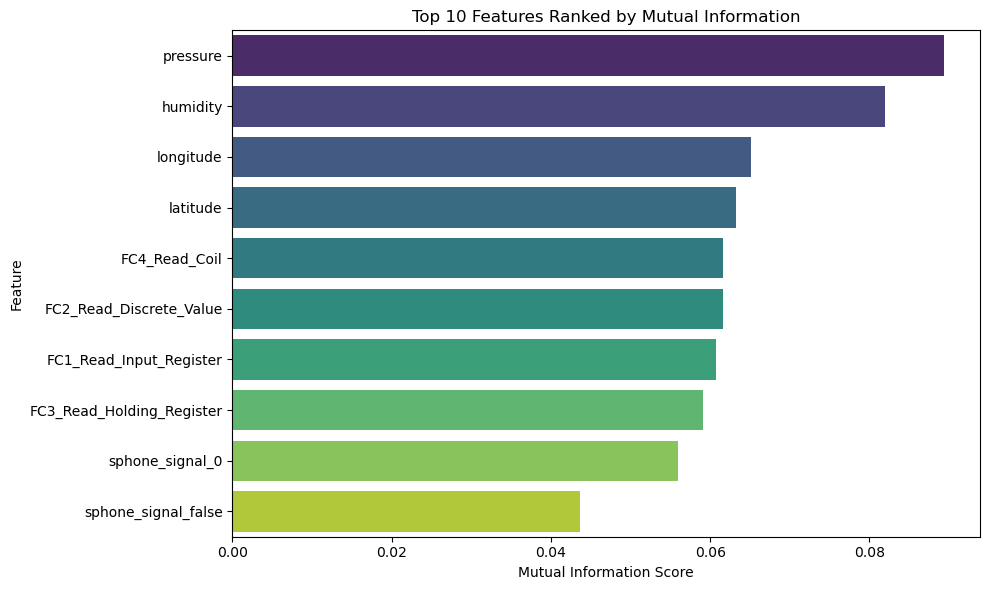

In [ ]:

# Feature Selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import seaborn as sns

# 1. Prepare data
# Drop rows where 'label' is missing, and fill other NaNs with 0 for simplicity
df_fs = df_all.copy().dropna(subset=['label']).fillna(0)

# Separate features (X) and target labels (y)
X = df_fs.drop(columns=['label'])
y = df_fs['label']

# One-hot encode categorical features to make them suitable for mutual information calculation
# 'drop_first=True' avoids dummy variable trap by removing one category per feature
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Apply SelectKBest with Mutual Information
# SelectKBest ranks features based on their mutual information with the target
# 'k="all"' means we want scores for every feature, not just the top k
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_encoded, y)

# Create a DataFrame to store feature names and their MI scores
mi_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Mutual_Info_Score': selector.scores_
}).sort_values(by='Mutual_Info_Score', ascending=False)

# Display the top 10 features with the highest mutual information scores
print("Top 10 features ranked by mutual information:\n")
print(mi_scores.head(10))

# 3. Plot feature importance
# Visualize the top 10 features using a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Mutual_Info_Score', 
    y='Feature', 
    data=mi_scores.head(10), 
    palette='viridis'
)
plt.title('Top 10 Features Ranked by Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Ensure the 'label' column exists before proceeding — a safety check
assert "label" in df_all.columns

# Split the dataset into features (X) and target labels (y)
X = df_all.drop(columns=["label"])        # All columns except 'label' are features
y = df_all["label"].astype(int)           # Convert labels to integers for modeling

# Identify numeric and categorical feature columns
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()         # Includes int and float types
categorical_cols = [c for c in X.columns if c not in numeric_cols]         # Everything else is treated as categorical

# Print dataset overview
print(f"Total rows: {len(df_all):,}")                                      # Total number of samples
print(f"X shape: {X.shape}  |  y shape: {y.shape}")                         # Feature and label dimensions
print(f"Numeric features: {len(numeric_cols)}  |  Categorical features: {len(categorical_cols)}")  # Feature type counts
print("Label balance (overall):", y.value_counts(normalize=True).round(3).to_dict())               # Class distribution


Total rows: 401,119
X shape: (401119, 18)  |  y shape: (401119,)
Numeric features: 13  |  Categorical features: 5
Label balance (overall): {0: 0.611, 1: 0.389}


In [ ]:
from sklearn.model_selection import train_test_split
from pathlib import Path

# Split the dataset into training and testing sets (80/20 split)
# 'stratify=y' ensures the label distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Print the shapes of the resulting splits
print(f"Train: {X_train.shape} | Test: {X_test.shape}")

# Show class balance in both sets to confirm stratification worked
print("Label balance (train):", y_train.value_counts(normalize=True).round(3).to_dict())
print("Label balance (test) :", y_test.value_counts(normalize=True).round(3).to_dict())

# Create output directory if it doesn't exist
out_dir = Path("artifacts/processed")
out_dir.mkdir(parents=True, exist_ok=True)

# Save the splits to CSV files for reproducibility and downstream use
X_train.to_csv(out_dir / "X_train_raw.csv", index=False)
X_test.to_csv(out_dir / "X_test_raw.csv", index=False)
y_train.to_frame("label").to_csv(out_dir / "y_train.csv", index=False)
y_test.to_frame("label").to_csv(out_dir / "y_test.csv", index=False)

# Confirm where the files were saved
print(f"Saved train/test splits to {out_dir.resolve()}")



Train: (320895, 18) | Test: (80224, 18)
Label balance (train): {0: 0.611, 1: 0.389}
Label balance (test) : {0: 0.611, 1: 0.389}
Saved train/test splits to /Users/chris/keele/ton-iot-ids/artifacts/processed


In [ ]:
# Shared setup: preprocessing, CV, and metrics

from pathlib import Path
import numpy as np
import pandas as pd

# Core scikit-learn modules for modeling and evaluation
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

# Folders for outputs (figures/metrics later) 
ARTIFACTS = Path("artifacts"); ARTIFACTS.mkdir(exist_ok=True)
FIGS = ARTIFACTS / "figures"; FIGS.mkdir(parents=True, exist_ok=True)
METRICS = ARTIFACTS / "metrics"; METRICS.mkdir(parents=True, exist_ok=True)

# Column buckets from earlier cells
# Assumes numeric_cols and categorical_cols are already defined
print(f"Numeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

# Preprocessing: identical for every model
# Numeric pipeline: fill missing values with median, then scale
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: fill missing values with most frequent, then one-hot encode
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine both pipelines into a single preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, numeric_cols),
        ("cat", categorical_tf, categorical_cols),
    ],
    remainder="drop"  # Drop any columns not explicitly handled
)

# Cross-validation (shared by all models)
# StratifiedKFold ensures label distribution is preserved across folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("CV:", cv)

# Scoring helpers (we’ll use these consistently)
def compute_binary_metrics(y_true, y_pred, y_proba=None):
    """Return a dict of core binary classification metrics."""
    out = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_macro": precision_score(y_true, y_pred, average="macro", zero_division=0),
        "recall_macro": recall_score(y_true, y_pred, average="macro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
    }
    if y_proba is not None:
        # y_proba should be the probability of the positive class (shape (n_samples,))
        # or a 2D array [:,1]; we’ll standardize later per model.
        try:
            out["roc_auc"] = roc_auc_score(y_true, y_proba)
        except Exception:
            out["roc_auc"] = np.nan
    else:
        out["roc_auc"] = np.nan
    return out

print("Setup complete: preprocess, CV, and metric helper ready.")



Numeric features: 13
Categorical features: 5
CV: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Setup complete: preprocess, CV, and metric helper ready.


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best params: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 2, 'clf__n_estimators': 400}
Best CV macro-F1 (3-fold): 0.7536

=== Test metrics (Random Forest, tree-encoding) ===
accuracy: 0.7636
precision_macro: 0.7722
recall_macro: 0.7850
f1_macro: 0.7622
roc_auc: 0.8897

Classification report:
              precision    recall  f1-score   support

           0     0.9012    0.6885    0.7806     49000
           1     0.6432    0.8815    0.7438     31224

    accuracy                         0.7636     80224
   macro avg     0.7722    0.7850    0.7622     80224
weighted avg     0.8008    0.7636    0.7663     80224



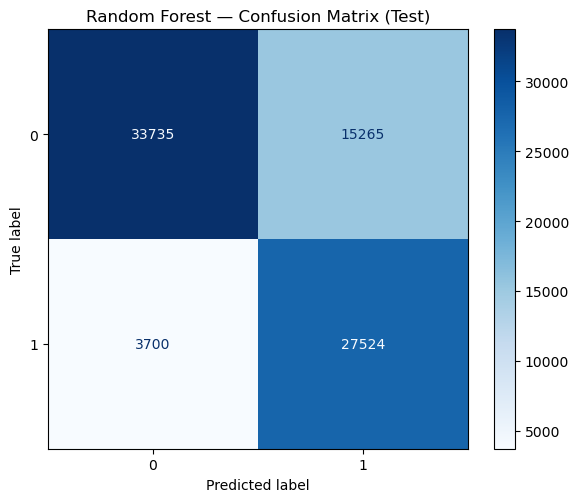

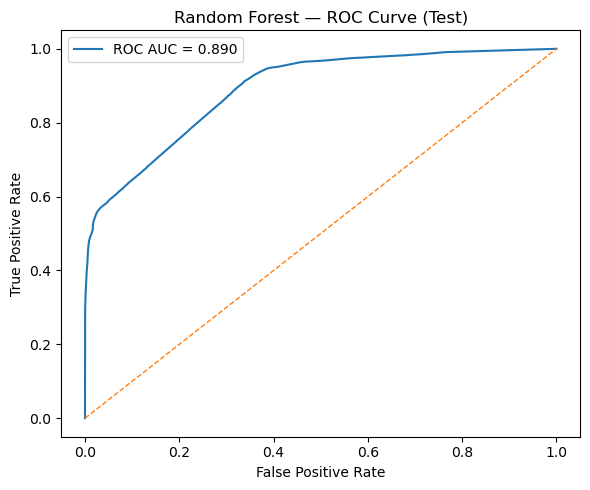

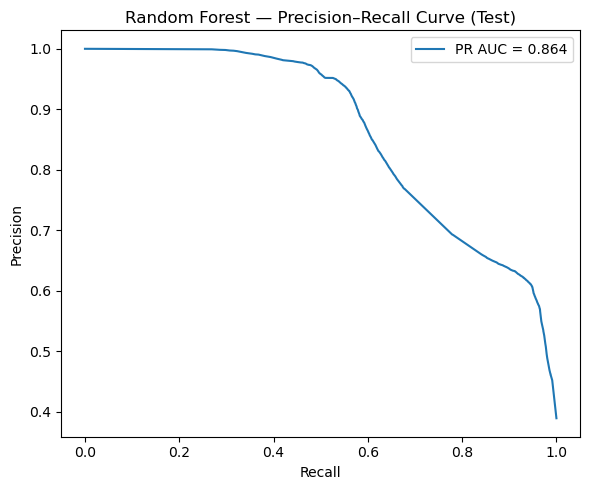


Saved model → artifacts/models/best_random_forest_treeenc.joblib
Saved metrics → artifacts/metrics/rf_treeenc_metrics.json


In [ ]:
# Model 1 (revised due to system constraints/runtime): Random Forest with tree-friendly encoding

# Imports for modeling, preprocessing, evaluation, and saving artifacts
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, precision_recall_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import json, joblib
from pathlib import Path

# 0) Use 3-fold CV for faster grid search (less memory/CPU usage)
cv_light = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1) Preprocessing for tree-based models (no scaling needed)
numeric_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))  # Fill missing numeric values with median
])
categorical_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))  # Encode categories as integers
])

# Combine numeric and categorical transformers
preprocess_tree = ColumnTransformer(
    transformers=[
        ("num", numeric_tf_tree, numeric_cols),
        ("cat", categorical_tf_tree, categorical_cols),
    ],
    remainder="drop"
)

# 2) Define Random Forest model and pipeline
rf_clf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # Handle class imbalance
)
rf_pipe = Pipeline(steps=[("prep", preprocess_tree), ("clf", rf_clf)])

# 3) Define hyperparameter grid for tuning
rf_param_grid = {
    "clf__n_estimators": [200, 400],
    "clf__max_depth": [None, 20],
    "clf__max_features": ["sqrt"],
    "clf__min_samples_split": [2, 5],
}

# 4) Run grid search with cross-validation
rf_grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    scoring="f1_macro",
    cv=cv_light,
    n_jobs=1,  # Avoid parallel fits to reduce memory usage
    refit=True,
    verbose=1,
)

# 5) Fit model on training data
rf_grid.fit(X_train, y_train)

# Show best parameters and CV score
print("\nBest params:", rf_grid.best_params_)
print("Best CV macro-F1 (3-fold):", f"{rf_grid.best_score_:.4f}")

# 6) Evaluate best model on test set
best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(X_test)

# Get predicted probabilities for ROC/PR curves
y_proba = None
try:
    y_proba = best_rf.predict_proba(X_test)[:, 1]
except Exception:
    pass

# Compute and print evaluation metrics
metrics = compute_binary_metrics(y_test, y_pred, y_proba)
print("\n=== Test metrics (Random Forest, tree-encoding) ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

# Print detailed classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# 7) Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title("Random Forest — Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 8) Plot ROC and Precision–Recall curves if probabilities are available
if y_proba is not None:
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], "--", lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest — ROC Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Precision–Recall Curve
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    plt.figure(figsize=(6, 5))
    plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Random Forest — Precision–Recall Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 9) Save model and metrics to disk
MODELS = Path("artifacts/models"); MODELS.mkdir(parents=True, exist_ok=True)
METRICS = Path("artifacts/metrics"); METRICS.mkdir(parents=True, exist_ok=True)

# Save trained model
joblib.dump(best_rf, MODELS / "best_random_forest_treeenc.joblib")

# Save metrics and best params as JSON
with open(METRICS / "rf_treeenc_metrics.json", "w") as f:
    json.dump(
        {
            "best_params": rf_grid.best_params_,
            "cv_macro_f1_3fold": float(rf_grid.best_score_),
            "test_metrics": {k: (float(v) if isinstance(v, (int, float, np.floating)) else v) for k, v in metrics.items()},
        },
        f,
        indent=2,
    )

print("\nSaved model → artifacts/models/best_random_forest_treeenc.joblib")
print("Saved metrics → artifacts/metrics/rf_treeenc_metrics.json")



scale_pos_weight (neg/pos): 1.569
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/opt/anaconda3/envs/tf/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:14:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:14:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:14:33] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda


Best params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 8, 'clf__n_estimators': 600, 'clf__reg_lambda': 1.0, 'clf__scale_pos_weight': 1.5693182273109412, 'clf__subsample': 0.8}
Best CV macro-F1 (3-fold): 0.7250

=== Test metrics (XGBoost, tree-encoding) ===
accuracy: 0.7326
precision_macro: 0.7332
recall_macro: 0.7453
f1_macro: 0.7295
roc_auc: 0.8576

Classification report:
              precision    recall  f1-score   support

           0     0.8453    0.6882    0.7587     49000
           1     0.6212    0.8023    0.7002     31224

    accuracy                         0.7326     80224
   macro avg     0.7332    0.7453    0.7295     80224
weighted avg     0.7581    0.7326    0.7359     80224



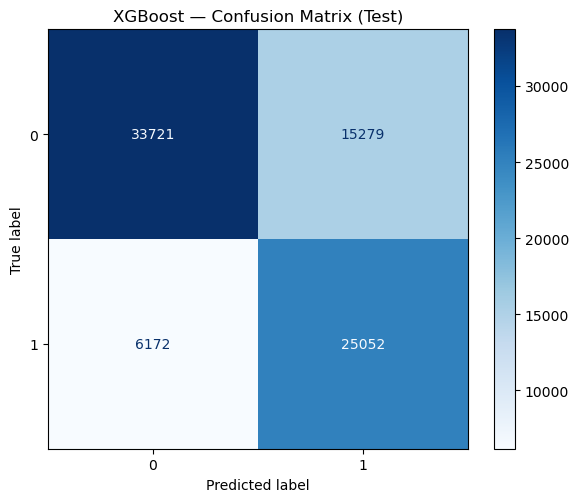

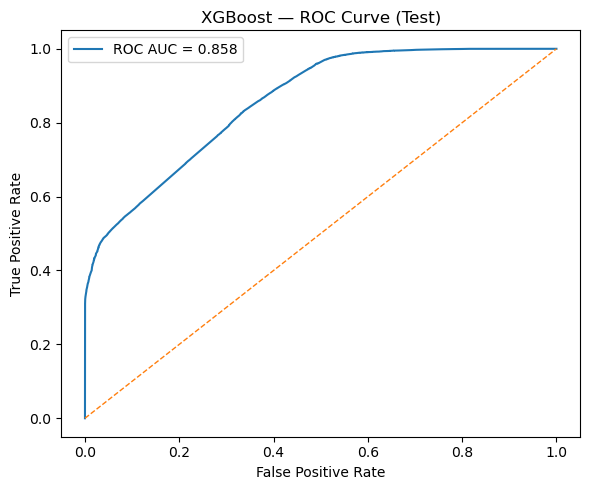

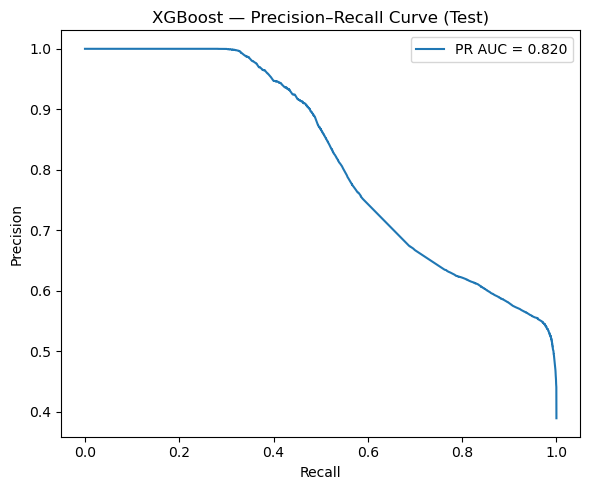


Saved model → artifacts/models/best_xgboost_treeenc.joblib
Saved metrics → artifacts/metrics/xgb_treeenc_metrics.json


In [ ]:
# Model 2: XGBoost — pipeline, tuning, evaluation (tree-friendly encoding)
import numpy as np
import json, joblib
import matplotlib.pyplot as plt
from pathlib import Path

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, precision_recall_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# 0) Light CV for tuning (match RF)
#    Rationale: 3-fold CV is a resource-aware compromise that still gives a
#    reliable generalisation estimate during grid search on this large dataset.
cv_light = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1) Tree-friendly preprocessing (reuse pattern from RF)
#    Rationale: Tree models (RF/XGB) do not require scaling, and work well
#    with compact ordinal encodings. This avoids the one-hot "feature blow-up"
#    and reduces memory/fit time while retaining category separation.
numeric_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))  # robust to skew/outliers
])
categorical_tf_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # preserves mode
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))  # safe for unseen cats
])

preprocess_tree = ColumnTransformer(
    transformers=[
        ("num", numeric_tf_tree, numeric_cols),
        ("cat", categorical_tf_tree, categorical_cols),
    ],
    remainder="drop"
)

# 2) Compute class imbalance weight: scale_pos_weight = (neg / pos) on TRAIN ONLY
#    Rationale: XGB supports class weighting directly; this balances the loss
#    contribution from minority class and often improves recall/F1 on imbalanced data.
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
scale_pos_weight = max(1.0, neg / max(1, pos))
print(f"scale_pos_weight (neg/pos): {scale_pos_weight:.3f}")

# 3) Define model and pipeline
#    - 'binary:logistic' for binary classification
#    - 'hist' tree_method = faster, memory-efficient histogram-based algorithm
#    - eval_metric='logloss' is stable for early feedback; we optimise F1 via GridSearchCV scoring
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",          # fast on tabular data
    n_jobs=-1,                   # parallelise tree building
    random_state=42,
    use_label_encoder=False      # ignored in modern xgboost; harmless
)

#    Pipeline = identical preprocessing applied inside CV loops (no leakage).
xgb_pipe = Pipeline(steps=[("prep", preprocess_tree), ("clf", xgb)])

# 4) Compact, sensible grid (kept small for speed/stability)
#    Rationale: cover the major bias–variance knobs without exploding search size.
#    - n_estimators/learning_rate trade-off
#    - max_depth controls complexity
#    - subsample/colsample add regularisation
#    - reg_lambda adds L2 regularisation
#    - scale_pos_weight tied to observed imbalance
xgb_param_grid = {
    "clf__n_estimators": [300, 600],
    "clf__max_depth": [4, 8],
    "clf__learning_rate": [0.1, 0.05],
    "clf__subsample": [0.8],
    "clf__colsample_bytree": [0.8],
    "clf__reg_lambda": [1.0, 2.0],
    "clf__scale_pos_weight": [scale_pos_weight],
}

# 5) Grid search with stratified CV; optimise macro-F1
#    Rationale: macro-F1 weights both classes equally (important under imbalance).
#    n_jobs=1 avoids parallel fold fits that can spike memory on large data.
xgb_grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=xgb_param_grid,
    scoring="f1_macro",
    cv=cv_light,
    n_jobs=1,          # safer memory profile than parallel folds
    refit=True,        # refit on full train with best params
    verbose=1,
)

# 6) Fit on training data
#    This runs preprocessing + XGB inside each CV fold; refits best on full train.
xgb_grid.fit(X_train, y_train)

print("\nBest params:", xgb_grid.best_params_)
print("Best CV macro-F1 (3-fold):", f"{xgb_grid.best_score_:.4f}")

# 7) Evaluate on held-out test set (kept untouched during tuning)
best_xgb = xgb_grid.best_estimator_
y_pred = best_xgb.predict(X_test)

# Probabilities for threshold-independent metrics (ROC/PR)
try:
    y_proba = best_xgb.predict_proba(X_test)[:, 1]
except Exception:
    y_proba = None

#    Compute consistent metrics via shared helper (accuracy, precision/recall/F1 macro, ROC-AUC)
metrics = compute_binary_metrics(y_test, y_pred, y_proba)
print("\n=== Test metrics (XGBoost, tree-encoding) ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# 8) Confusion matrix
#    Rationale: gives concrete counts for FP/FN patterns beyond scalar metrics.
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title("XGBoost — Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 9) ROC and PR curves (if probabilities available)
#    Rationale: ROC shows separability across thresholds; PR is informative with imbalance.
if y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], "--", lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("XGBoost — ROC Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    plt.figure(figsize=(6, 5))
    plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("XGBoost — Precision–Recall Curve (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 10) Persist artefacts
#     Rationale: enables reproducibility and external verification (per assignment).
MODELS = Path("artifacts/models"); MODELS.mkdir(parents=True, exist_ok=True)
METRICS = Path("artifacts/metrics"); METRICS.mkdir(parents=True, exist_ok=True)

joblib.dump(best_xgb, MODELS / "best_xgboost_treeenc.joblib")
with open(METRICS / "xgb_treeenc_metrics.json", "w") as f:
    json.dump(
        {
            "best_params": xgb_grid.best_params_,
            "cv_macro_f1_3fold": float(xgb_grid.best_score_),
            "test_metrics": {k: (float(v) if isinstance(v, (int, float, np.floating)) else v) for k, v in metrics.items()},
        },
        f,
        indent=2,
    )

print("\nSaved model → artifacts/models/best_xgboost_treeenc.joblib")
print("Saved metrics → artifacts/metrics/xgb_treeenc_metrics.json")


Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best params: {'clf__estimator__C': 1.0}
Best CV macro-F1 (3-fold): 0.5920

=== Test metrics (Linear SVM, calibrated) ===
accuracy: 0.6863
precision_macro: 0.7265
recall_macro: 0.6106
f1_macro: 0.5940
roc_auc: 0.7220

Classification report:
              precision    recall  f1-score   support

           0     0.6715    0.9520    0.7875     49000
           1     0.7814    0.2692    0.4005     31224

    accuracy                         0.6863     80224
   macro avg     0.7265    0.6106    0.5940     80224
weighted avg     0.7143    0.6863    0.6369     80224



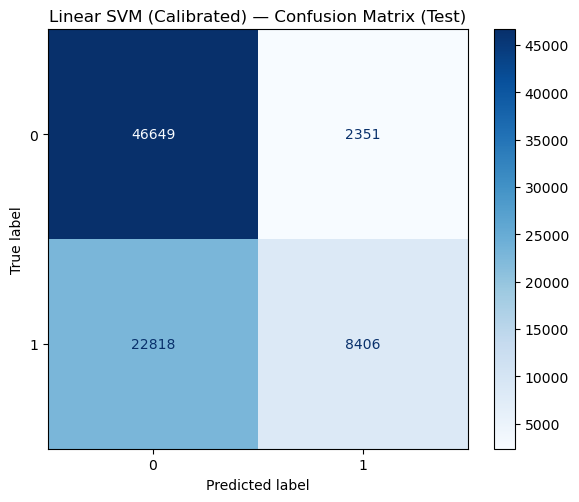

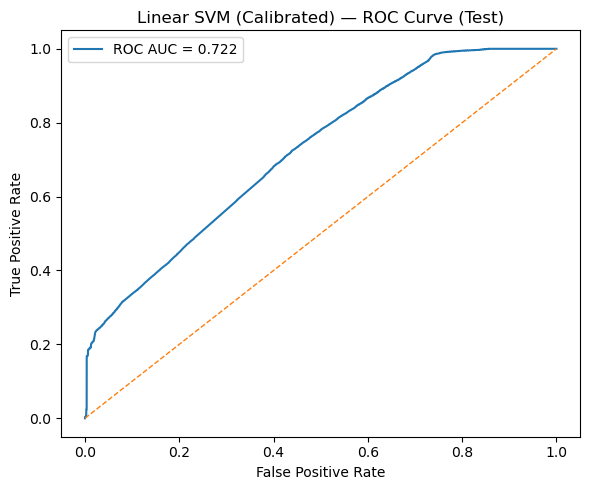

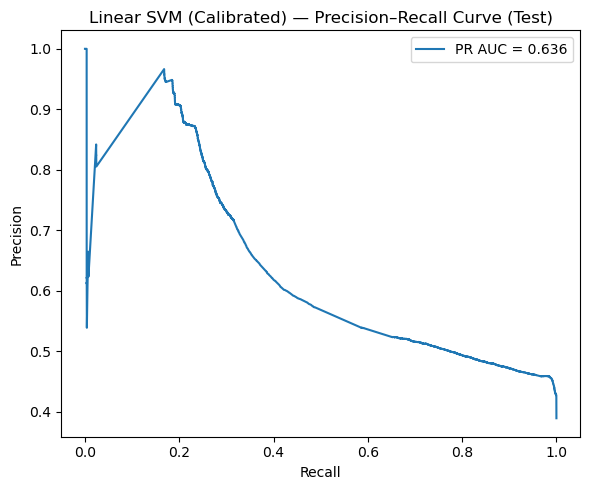


Saved model → artifacts/models/best_linear_svm_calibrated.joblib
Saved metrics → artifacts/metrics/svm_calibrated_metrics.json


In [ ]:
# Model 3: Linear SVM (LinearSVC + calibrated probabilities), one-hot sparse
import numpy as np
import json, joblib
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, precision_recall_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 0) Light CV for tuning
#    Rationale: 3-fold StratifiedKFold is a resource-aware choice on large data.
#    Stratification preserves the benign/attack ratio in each fold.
cv_light = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1) Linear-model-friendly preprocessing (sparse all the way)
#    Rationale: Linear models prefer scaled numerics and sparse one-hot cats.
#    Using with_mean=False keeps StandardScaler compatible with sparse matrices.
numeric_tf_lin = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),     # robust to outliers/skew
    ("scaler", StandardScaler(with_mean=False))        # scale magnitudes for LinearSVC
])
categorical_tf_lin = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),                 # fill missing cats
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))# sparse to control memory
])

#    ColumnTransformer applies both pipelines and returns a single (sparse) design matrix.
preprocess_linear = ColumnTransformer(
    transformers=[
        ("num", numeric_tf_lin, numeric_cols),
        ("cat", categorical_tf_lin, categorical_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0  # favour sparse output; better for memory and LinearSVC
)

# 2) Base linear SVM + calibration
#    Rationale: LinearSVC is fast and scales well, but it doesn't output probabilities.
#    CalibratedClassifierCV wraps it to produce calibrated probabilities (for ROC/PR).
#    class_weight='balanced' compensates for the ~61/39 label imbalance.
base_svm = LinearSVC(
    random_state=42,
    loss="squared_hinge",
    max_iter=5000,
    class_weight="balanced"
)

#    API note: modern scikit-learn uses estimator= (not base_estimator=).
#    method='sigmoid' (Platt scaling) is standard for binary probability calibration.
calibrated_svm = CalibratedClassifierCV(
    estimator=base_svm,
    cv=3,                 # internal CV for calibration; independent of outer GridSearchCV
    method="sigmoid"
)

#    The full pipeline ensures preprocessing happens INSIDE CV folds (no leakage).
svm_pipe = Pipeline(steps=[("prep", preprocess_linear), ("clf", calibrated_svm)])

# 3) Compact grid over margin penalty C
#    Rationale: C controls margin width vs. misclassification penalty; a small, log-spaced grid
#    is typically sufficient for linear SVMs on large tabular data.
svm_param_grid = {
    "clf__estimator__C": [0.1, 1.0, 10.0]
}

#    GridSearchCV optimises macro-F1 (treats both classes equally under imbalance).
#    n_jobs=1 avoids multiple concurrent fits that could spike memory usage.
svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=svm_param_grid,
    scoring="f1_macro",
    cv=cv_light,
    n_jobs=1,
    refit=True,
    verbose=1
)

# 4) Fit
#    This runs the full pipeline per fold; then refits the best configuration on all training data.
svm_grid.fit(X_train, y_train)

print("\nBest params:", svm_grid.best_params_)
print("Best CV macro-F1 (3-fold):", f"{svm_grid.best_score_:.4f}")

# 5) Evaluate on the untouched test set
best_svm = svm_grid.best_estimator_
y_pred = best_svm.predict(X_test)

#    Because we calibrated, we now have well-formed probabilities for ROC/PR curves.
y_proba = best_svm.predict_proba(X_test)[:, 1]

#    Consistent metric computation (accuracy, precision/recall/F1 macro, ROC-AUC).
metrics = compute_binary_metrics(y_test, y_pred, y_proba)
print("\n=== Test metrics (Linear SVM, calibrated) ===")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# 6) Confusion matrix
#    Gives raw FP/FN counts to complement scalar metrics.
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(ax=ax, cmap="Blues", values_format="d")
ax.set_title("Linear SVM (Calibrated) — Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 7) ROC & PR
#    Threshold-independent diagnostics; PR is especially informative with class imbalance.
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Linear SVM (Calibrated) — ROC Curve (Test)")
plt.legend(); plt.tight_layout(); plt.show()

prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec, prec)
plt.figure(figsize=(6, 5))
plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Linear SVM (Calibrated) — Precision–Recall Curve (Test)")
plt.legend(); plt.tight_layout(); plt.show()

# 8) Save artefacts
#    Persist model and metrics for reproducibility and assessor verification.
MODELS = Path("artifacts/models"); MODELS.mkdir(parents=True, exist_ok=True)
METRICS = Path("artifacts/metrics"); METRICS.mkdir(parents=True, exist_ok=True)

joblib.dump(best_svm, MODELS / "best_linear_svm_calibrated.joblib")
with open(METRICS / "svm_calibrated_metrics.json", "w") as f:
    json.dump(
        {
            "best_params": svm_grid.best_params_,
            "cv_macro_f1_3fold": float(svm_grid.best_score_),
            "test_metrics": {k: float(v) for k, v in metrics.items()},
        },
        f,
        indent=2,
    )

print("\nSaved model → artifacts/models/best_linear_svm_calibrated.joblib")
print("Saved metrics → artifacts/metrics/svm_calibrated_metrics.json")



In [ ]:
# Baseline model: DummyClassifier (most_frequent) 
from sklearn.dummy import DummyClassifier
import numpy as np, json
from pathlib import Path

# 1) Fit baseline on the same training data (no heavy preprocessing needed)
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

# 2) Predict on test
y_pred = dummy.predict(X_test)

# 3) Probabilities (may or may not be available; try gracefully)
try:
    y_proba = dummy.predict_proba(X_test)[:, 1]
except Exception:
    y_proba = None

# 4) Compute metrics with your shared helper
dummy_metrics = compute_binary_metrics(y_test, y_pred, y_proba)
print("=== Test metrics (Dummy baseline: most_frequent) ===")
for k, v in dummy_metrics.items():
    if isinstance(v, (int, float, np.floating)):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}: {v}")

# 5) Persist baseline metrics
METRICS = Path("artifacts/metrics"); METRICS.mkdir(parents=True, exist_ok=True)
with open(METRICS / "dummy_metrics.json", "w") as f:
    json.dump(
        {
            "best_params": {"strategy": "most_frequent"},
            "cv_macro_f1_3fold": None,  # no CV for dummy
            "test_metrics": {k: float(v) if isinstance(v, (int, float, np.floating)) else v
                             for k, v in dummy_metrics.items()},
        },
        f,
        indent=2,
    )

print("\nSaved baseline metrics → artifacts/metrics/dummy_metrics.json")


=== Test metrics (Dummy baseline: most_frequent) ===
accuracy: 0.6108
precision_macro: 0.3054
recall_macro: 0.5000
f1_macro: 0.3792
roc_auc: 0.5000

Saved baseline metrics → artifacts/metrics/dummy_metrics.json



=== Model Comparison (sorted by test_f1_macro) ===


,model,cv_macro_f1,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc,best_params
0,Random Forest (tree-enc),0.753592,0.763599,0.772206,0.784985,0.762174,0.889699,"{'clf__max_depth': None, 'clf__max_features': ..."
1,XGBoost (tree-enc),0.725033,0.732611,0.733223,0.745258,0.729452,0.857602,"{'clf__colsample_bytree': 0.8, 'clf__learning_..."
2,"Linear SVM (calibrated, one-hot)",0.592020,0.686266,0.726486,0.610618,0.594006,0.721963,{'clf__estimator__C': 1.0}
3,Baseline (Dummy-most_frequent),NaN,0.610790,0.305395,0.500000,0.379187,0.500000,{'strategy': 'most_frequent'}



Saved comparison table → /Users/chris/keele/ton-iot-ids/artifacts/metrics/model_comparison.csv
Saved RF CV results → artifacts/metrics/rf_cv_results.csv
Saved XGB CV results → artifacts/metrics/xgb_cv_results.csv
Saved SVM CV results → artifacts/metrics/svm_cv_results.csv


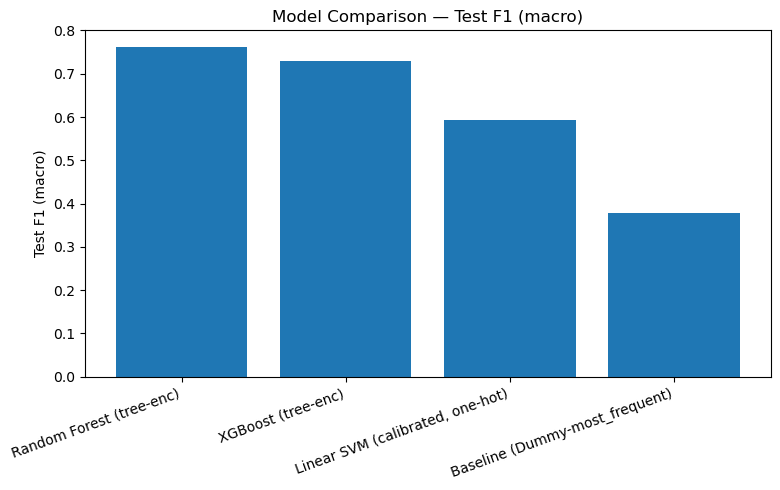

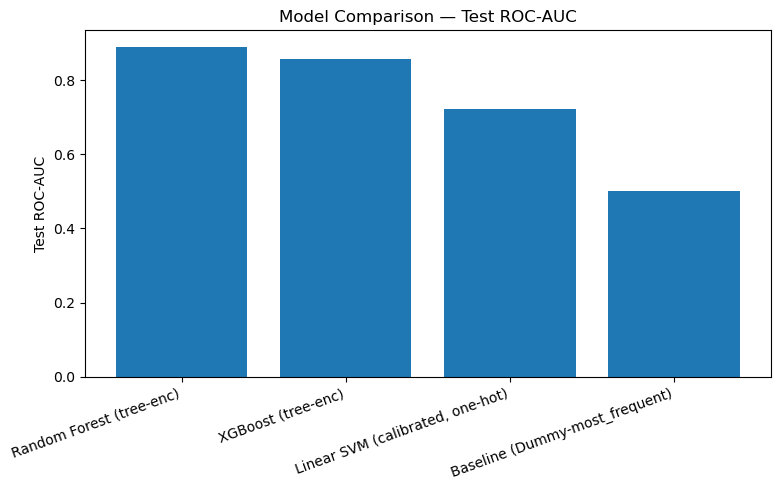

In [ ]:
# Build comparison table across models and save 
import json, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

METRICS = Path("artifacts/metrics")

# 1) Helper to load a metrics file safely
def load_metrics(name, fname):
    p = METRICS / fname
    with open(p, "r") as f:
        d = json.load(f)
    test = d.get("test_metrics", {})
    return {
        "model": name,
        "cv_macro_f1": d.get("cv_macro_f1_3fold") or d.get("cv_macro_f1"),
        "test_accuracy": test.get("accuracy"),
        "test_precision_macro": test.get("precision_macro"),
        "test_recall_macro": test.get("recall_macro"),
        "test_f1_macro": test.get("f1_macro"),
        "test_roc_auc": test.get("roc_auc"),
        "best_params": d.get("best_params")
    }

rows = []
rows.append(load_metrics("Baseline (Dummy-most_frequent)", "dummy_metrics.json"))
rows.append(load_metrics("Random Forest (tree-enc)", "rf_treeenc_metrics.json"))
rows.append(load_metrics("XGBoost (tree-enc)", "xgb_treeenc_metrics.json"))
rows.append(load_metrics("Linear SVM (calibrated, one-hot)", "svm_calibrated_metrics.json"))

df_cmp = pd.DataFrame(rows)

# 2) Sort by a key metric (macro F1) for quick reading
df_cmp_sorted = df_cmp.sort_values(by="test_f1_macro", ascending=False).reset_index(drop=True)

# 3) Display and save
display_cols = ["model", "cv_macro_f1", "test_accuracy", "test_precision_macro",
                "test_recall_macro", "test_f1_macro", "test_roc_auc", "best_params"]
print("\n=== Model Comparison (sorted by test_f1_macro) ===")
display(df_cmp_sorted[display_cols])

out_csv = METRICS / "model_comparison.csv"
df_cmp_sorted.to_csv(out_csv, index=False)
print(f"\nSaved comparison table → {out_csv.resolve()}")

# 4) Optional: export CV results from current session’s grid objects (if present)
CVOUT = METRICS
saved_any = False
if "rf_grid" in globals():
    pd.DataFrame(rf_grid.cv_results_).to_csv(CVOUT / "rf_cv_results.csv", index=False)
    print("Saved RF CV results → artifacts/metrics/rf_cv_results.csv"); saved_any = True
if "xgb_grid" in globals():
    pd.DataFrame(xgb_grid.cv_results_).to_csv(CVOUT / "xgb_cv_results.csv", index=False)
    print("Saved XGB CV results → artifacts/metrics/xgb_cv_results.csv"); saved_any = True
if "svm_grid" in globals():
    pd.DataFrame(svm_grid.cv_results_).to_csv(CVOUT / "svm_cv_results.csv", index=False)
    print("Saved SVM CV results → artifacts/metrics/svm_cv_results.csv"); saved_any = True
if not saved_any:
    print("(No in-memory GridSearch objects found to export CV results.)")

# 5) Simple bar charts for key metrics (F1 and ROC-AUC)
plt.figure(figsize=(8,5))
plt.bar(df_cmp_sorted["model"], df_cmp_sorted["test_f1_macro"])
plt.ylabel("Test F1 (macro)")
plt.title("Model Comparison — Test F1 (macro)")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(df_cmp_sorted["model"], df_cmp_sorted["test_roc_auc"])
plt.ylabel("Test ROC-AUC")
plt.title("Model Comparison — Test ROC-AUC")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()
